<a href="https://colab.research.google.com/github/Phatdeluxe/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
import matplotlib.pyplot as plt
from IPython.display import display, Image
import pandas as pd
import numpy as np

In [5]:
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
remake = pd.Series([39, 3, 2, 1, 3, 4, 6, 6, 6, 34],
                   index=range(1,11))

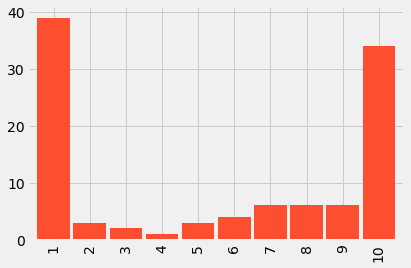

In [11]:
plt.style.use('fivethirtyeight')

remake.plot.bar(color='C1', width=0.9);

In [13]:
display(example)

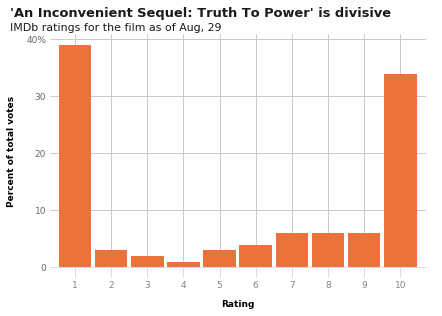

In [135]:
plt.style.use('fivethirtyeight')

# Making figure, and making it transparent
fig = plt.figure()
fig.patch.set(facecolor='#383838')
fig.patch.set_alpha(0)

# Making the axes and making it transparent
ax = remake.plot.bar(color='#ED713A', width=0.9)
ax.patch.set_alpha(0)

# Adding titles
ax.text(x=-1.8, y=44, s="'An Inconvenient Sequel: Truth To Power' is divisive", fontweight='bold', fontsize=13, color ='#1a1a1a')
ax.text(x=-1.8, y=41.5, s='IMDb ratings for the film as of Aug, 29', fontsize=11, color='#1a1a1a')

# Removing all spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.8)
ax.spines['bottom'].set_color('#d4d4d4')

# Labeling the axes
ax.set_xlabel('Rating', labelpad=10, fontsize=9, fontweight='bold')
ax.set_ylabel('Percent of total votes', labelpad=10, fontsize=9, fontweight='bold')

# Increasing the length of x-ticks, changing the tick labels, and righting the x tick labels
ax.tick_params(axis='x', length=10, color='#d4d4d4')
ax.set_xticklabels(range(1,11), fontsize=9, rotation=0, alpha=50, color='#686868')
ax.set_yticklabels([0, 10, 20, 30, '40%'], fontsize=9, color='#686868')


plt.show();

In [132]:
display(example)

In [57]:
url1 = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png?w=575'
example1 = Image(url=url1, width=400)

display(example1)

## This first plot was me trying to eyeball the data and enter it.

In [0]:
acm = pd.Series([90, 75, 74, 62.5, 61, 39, 38, 38, 25, 23, 23, 33, 32, 27, 40, 38, 41], 
                index=range(1, 18))
media = pd.Series([9, 14, 19, 26, 25, 26, 30, 27, 30, 49, 32, 29, 30, 31, 30, 31, 24],
                  index=range(1, 18))

gap = pd.Series([1, 8, 4, 6, 8, 24, 18, 20, 29, 21, 21, 29, 28, 20, 12, 12, 15], 
                index=range(1,18))

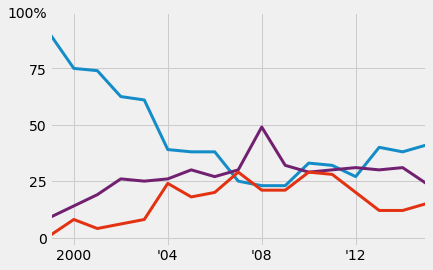

In [113]:
fig1 = plt.figure()


ax1 = acm.plot.line(color='#148cc7', linewidth=3)
ax2 = media.plot.line(color='#722171', linewidth=3)
ax3 = gap.plot.line(color='#e33212', linewidth=3)


ax1.set_xticks([2, 6, 10, 14])
ax1.set_xticklabels([2000, "'04", "'08", "'12"])
ax1.set_yticks([0, 25, 50, 75, 100])
ax1.set_yticklabels([0, 25, 50, 75, '100%'])

ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_linewidth(1)

## Here I found the actual Data set, and I am trying to manipulate it to get the graph they have

In [0]:
lateShow = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')

In [126]:
lateShow.head()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier


In [130]:
lateShow.isnull().sum()

YEAR                          0
GoogleKnowlege_Occupation    26
Show                          0
Group                        31
Raw_Guest_List                0
dtype: int64

In [0]:
# Cleaning the data, there were 2 media groups.
lateShow['Group'] = lateShow['Group'].str.capitalize()

In [131]:
lateShow['Group'].value_counts(dropna=False)

Acting            930
Media             751
Politician        308
Comedy            150
Musician          123
Academic          103
Athletics          52
Misc               45
Government         40
Political Aide     36
NaN                31
Science            28
Business           25
Advocacy           24
Consultant         18
Military           16
Clergy              8
media               5
Name: Group, dtype: int64

I need three graphs, each comparing the year, to the percent of occupation on the late show

I am thinking I will make a new dataframe with normalized data, then use that data to create three other dataframes to plot these lines

In [0]:
laterShow = pd.DataFrame()

In [0]:
laterShow['']

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here